In [ ]:
spark

In [ ]:
from pyspark.sql.types import StructField,StructType,IntegerType,StringType,BooleanType,DataType,DecimalType,DateType,DoubleType
from pyspark.sql.functions import col,when,sum,avg,row_number
from pyspark.sql.window import Window

In [ ]:
from pyspark.sql import SparkSession

#create session
spark=SparkSession.builder.appName('IPL_Data_Analysis').getOrCreate()
spark

In [ ]:
configs = {
    "fs.azure.account.auth.type": "OAuth",
    "fs.azure.account.oauth.provider.type": "org.apache.hadoop.fs.azurebfs.oauth2.ClientCredsTokenProvider",
    "fs.azure.account.oauth2.client.id": "**",
    "fs.azure.account.oauth2.client.secret": "**",
    "fs.azure.account.oauth2.client.endpoint": "https://login.microsoftonline.com/**/oauth2/token"
}

dbutils.fs.mount(
    source="abfss://ipldata@iplprojectstorage.dfs.core.windows.net",
    mount_point="/mnt/ipl",
    extra_configs=configs
)

---------------------------------------------------------------------------
ExecutionError                            Traceback (most recent call last)
File <command-3158603520931495>, line 9
      1 configs = {
      2     "fs.azure.account.auth.type": "OAuth",
      3     "fs.azure.account.oauth.provider.type": "org.apache.hadoop.fs.azurebfs.oauth2.ClientCredsTokenProvider",
   (...)
      6     "fs.azure.account.oauth2.client.endpoint": "https://login.microsoftonline.com/3aa12c10-db7b-4463-92e2-5e7adf58faa0/oauth2/token"
      7 }
----> 9 dbutils.fs.mount(
     10     source="abfss://ipldata@iplprojectstorage.dfs.core.windows.net",
     11     mount_point="/mnt/ipl",
     12     extra_configs=configs
     13 )

File /databricks/python_shell/dbruntime/dbutils.py:378, in DBUtils.FSHandler.prettify_exception_message.<locals>.f_with_exception_handling(*args, **kwargs)
    376 exc.__context__ = None
    377 exc.__cause__ = None
--> 378 raise exc

ExecutionError: An error occurred while c

In [ ]:
%fs
ls "/mnt/ipl"

path,name,size,modificationTime
dbfs:/mnt/ipl/Ball_By_Ball.csv,Ball_By_Ball.csv,25099132,1723233244000
dbfs:/mnt/ipl/Match.csv,Match.csv,113358,1723233236000
dbfs:/mnt/ipl/Player.csv,Player.csv,34614,1723233236000
dbfs:/mnt/ipl/Player_match.csv,Player_match.csv,2664692,1723233237000
dbfs:/mnt/ipl/Team.csv,Team.csv,343,1723233236000


In [ ]:
ball_by_ball_schema=StructType([
   StructField("MatcH_id", IntegerType(), nullable=True),
    StructField("Over_id", IntegerType(), nullable=True),
    StructField("Ball_id", IntegerType(), nullable=True),
    StructField("Innings_No", IntegerType(), nullable=True),
    StructField("Team_Batting", StringType(), nullable=True),
    StructField("Team_Bowling", StringType(), nullable=True),
    StructField("Striker_Batting_Position", IntegerType(), nullable=True),
    StructField("Extra_Type", StringType(), nullable=True),
    StructField("Runs_Scored", IntegerType(), nullable=True),
    StructField("Extra_runs", IntegerType(), nullable=True),
    StructField("Wides", IntegerType(), nullable=True),
    StructField("Legbyes", IntegerType(), nullable=True),
    StructField("Byes", IntegerType(), nullable=True),
    StructField("Noballs", IntegerType(), nullable=True),
    StructField("Penalty", IntegerType(), nullable=True),
    StructField("Bowler_Extras", IntegerType(), nullable=True),
    StructField("Out_type", StringType(), nullable=True),
    StructField("Caught", IntegerType(), nullable=True),
    StructField("Bowled", IntegerType(), nullable=True),
    StructField("Run_out", IntegerType(), nullable=True),
    StructField("LBW", IntegerType(), nullable=True),
    StructField("Retired_hurt", IntegerType(), nullable=True),
    StructField("Stumped", IntegerType(), nullable=True),
    StructField("caught_and_bowled", IntegerType(), nullable=True),
    StructField("hit_wicket", IntegerType(), nullable=True),
    StructField("ObstructingFeild", IntegerType(), nullable=True),
    StructField("Bowler_Wicket", IntegerType(), nullable=True),
    StructField("Match_Date", DateType(), nullable=True),
    StructField("Season", IntegerType(), nullable=True),
    StructField("Striker", IntegerType(), nullable=True),
    StructField("Non_Striker", IntegerType(), nullable=True),
    StructField("Bowler", IntegerType(), nullable=True),
    StructField("Player_Out", IntegerType(), nullable=True),
    StructField("Fielders", IntegerType(), nullable=True),
    StructField("Striker_match_SK", IntegerType(), nullable=True),
    StructField("StrikerSK", IntegerType(), nullable=True),
    StructField("NonStriker_match_SK", IntegerType(), nullable=True),
    StructField("NONStriker_SK", IntegerType(), nullable=True),
    StructField("Fielder_match_SK", IntegerType(), nullable=True),
    StructField("Fielder_SK", IntegerType(), nullable=True),
    StructField("Bowler_match_SK", IntegerType(), nullable=True),
    StructField("BOWLER_SK", IntegerType(), nullable=True),
    StructField("PlayerOut_match_SK", IntegerType(), nullable=True),
    StructField("BattingTeam_SK", IntegerType(), nullable=True),
    StructField("BowlingTeam_SK", IntegerType(), nullable=True),
    StructField("Keeper_Catch", IntegerType(), nullable=True),
    StructField("Player_out_sk", IntegerType(), nullable=True),
    StructField("MatchDateSK", IntegerType(), nullable=True),
])
match_schema=StructType([
    StructField("Match_SK", IntegerType(), nullable=True),
    StructField("match_id", IntegerType(), nullable=True),
    StructField("Team1", StringType(), nullable=True),
    StructField("Team2", StringType(), nullable=True),
    StructField("match_date", DateType(), nullable=True),
    StructField("Season_Year", IntegerType(), nullable=True),
    StructField("Venue_Name", StringType(), nullable=True),
    StructField("City_Name", StringType(), nullable=True),
    StructField("Country_Name", StringType(), nullable=True),
    StructField("Toss_Winner", StringType(), nullable=True),
    StructField("match_winner", StringType(), nullable=True),
    StructField("Toss_Name", StringType(), nullable=True),
    StructField("Win_Type", StringType(), nullable=True),
    StructField("Outcome_Type", StringType(), nullable=True),
    StructField("ManOfMach", StringType(), nullable=True),
    StructField("Win_Margin", StringType(), nullable=True),
    StructField("Country_id", IntegerType(), nullable=True),
])
player_match_schema=StructType([
    StructField("Player_match_SK", IntegerType(), nullable=True),
    StructField("PlayerMatch_key", DoubleType(), nullable=True),
    StructField("Match_Id", IntegerType(), nullable=True),
    StructField("Player_Id", IntegerType(), nullable=True),
    StructField("Player_Name", StringType(), nullable=True),
    StructField("DOB", DateType(), nullable=True),
    StructField("Batting_hand", StringType(), nullable=True),
    StructField("Bowling_skill", StringType(), nullable=True),
    StructField("Country_Name", StringType(), nullable=True),
    StructField("Role_Desc", StringType(), nullable=True),
    StructField("Player_team", StringType(), nullable=True),
    StructField("Opposit_Team", StringType(), nullable=True),
    StructField("Season_year", IntegerType(), nullable=True),
    StructField("is_manofThematch", IntegerType(), nullable=True),
    StructField("Age_As_on_match", IntegerType(), nullable=True),
    StructField("IsPlayers_Team_won", IntegerType(), nullable=True),
    StructField("Batting_Status", StringType(), nullable=True),
    StructField("Bowling_Status", StringType(), nullable=True),
    StructField("Player_Captain", StringType(), nullable=True),
    StructField("Opposit_captain", StringType(), nullable=True),
    StructField("Player_keeper", StringType(), nullable=True),
    StructField("Opposit_keeper", StringType(), nullable=True),
])
player_schema=StructType([
    StructField("PLAYER_SK", IntegerType(), nullable=True),
    StructField("Player_Id", IntegerType(), nullable=True),
    StructField("Player_Name", StringType(), nullable=True),
    StructField("DOB", DateType(), nullable=True),
    StructField("Batting_hand", StringType(), nullable=True),
    StructField("Bowling_skill", StringType(), nullable=True),
    StructField("Country_Name", StringType(), nullable=True),
])
team_schema=StructType([
    StructField("Team_SK", IntegerType(), nullable=True),
    StructField("Team_Id", IntegerType(), nullable=True),
    StructField("Team_Name", StringType(), nullable=True),
])

In [ ]:
ball_by_ball_df=spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").option("inferschema","true").load("/mnt/ipl/Ball_By_Ball.csv")
match_df=spark.read.schema(match_schema).format("csv").option("header","true").option("inferschema","true").load("/mnt/ipl/Match.csv")
Player_match_df=spark.read.schema(player_match_schema).format("csv").option("header","true").option("inferschema","true").load("/mnt/ipl/Player_match.csv")
player_df=spark.read.schema(player_schema).format("csv").option("header","true").option("inferschema","true").load("/mnt/ipl/Player.csv")
team_df=spark.read.schema(team_schema).format("csv").option("header","true").option("inferschema","true").load("/mnt/ipl/Team.csv")

In [ ]:
#Filtering the Wides and No-Balls to get only Legal Delieveries

ball_by_ball_df=ball_by_ball_df.filter((col("wides")==0)&(col("noballs")==0))
ball_by_ball_df

#Aggregation - Calculate the total and average runs scored in each match and inning
total_and_avg_runs=ball_by_ball_df.groupBy("match_id","innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
)
total_and_avg_runs.show()

+--------+----------+----------+------------------+
|match_id|innings_no|total_runs|      average_runs|
+--------+----------+----------+------------------+
|  980940|         1|       138|              1.15|
|  419132|         1|       162|              1.35|
|  336009|         1|       151|1.2583333333333333|
|  501203|         1|       150|              1.25|
|  598022|         4|        11|1.8333333333333333|
|  829828|         1|       196|1.6333333333333333|
|  729308|         2|       135|1.1842105263157894|
|  829794|         2|       157| 1.353448275862069|
| 1082632|         2|       202|1.9238095238095239|
|  335993|         1|       131|1.0916666666666666|
|  335993|         2|       131|1.6794871794871795|
| 1082617|         1|       123|1.0512820512820513|
|  419133|         2|       149|1.2416666666666667|
|  548327|         2|       151|1.3017241379310345|
|  980910|         2|       156| 1.471698113207547|
|  548367|         2|       134|1.1166666666666667|
| 1082601|  

In [ ]:
windowSpec=Window.partitionBy("match_id","innings_no").orderBy("over_id")

ball_by_ball_df=ball_by_ball_df.withColumn(
    "running_total_runs",sum("runs_scored").over(windowSpec)
    )



In [ ]:
ball_by_ball_df=ball_by_ball_df.withColumn(
    "high_impact",
    when((col("runs_scored")+col("extra_runs")>6) | (col("bowler_wicket")==True),True).otherwise(False)
    )

In [ ]:
from pyspark.sql.functions import year,month,dayofmonth,when

match_df=match_df.withColumn("year",year("match_date"))
match_df=match_df.withColumn("month",year("match_date"))
match_df=match_df.withColumn("day",year("match_date"))

match_df=match_df.withColumn(
    "win_margin_category",
    when(col("win_margin")>=100,"High")
    .when((col("win_margin")>=50)&(col("win_margin")<100),"Medium")
    .otherwise("Low")
)


match_df=match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner")==col("match_winner"),"Yes").otherwise("No")
)

match_df.show()

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+-----------------+
|Match_SK|match_id|               Team1|               Team2|match_date|Season_Year|          Venue_Name| City_Name|Country_Name|         Toss_Winner|        match_winner|Toss_Name|Win_Type|Outcome_Type|    ManOfMach|Win_Margin|Country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      NULL|       2008|M Chinnaswamy Sta...| Bangalore|  

In [ ]:
from pyspark.sql.functions import lower, regexp_replace

player_df=player_df.withColumn("player_name",lower(regexp_replace("player_name","[^a-zA-Z0-9]","")))

player_df=player_df.na.fill({"batting_hand":"unkown","bowling_skill":"unknown"})

player_df=player_df.withColumn("batting_style",when(col("batting_hand").contains("Left"),"Left-handed").otherwise("Right-Handed"))

player_df.show(2)


+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|PLAYER_SK|Player_Id|player_name| DOB|  Batting_hand|   Bowling_skill|Country_Name|batting_style|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|        0|        1|  scganguly|NULL| Left-hand bat|Right-arm medium|       India|  Left-handed|
|        1|        2| bbmccullum|NULL|Right-hand bat|Right-arm medium| New Zealand| Right-Handed|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
only showing top 2 rows



In [ ]:
from pyspark.sql.functions import current_date

Player_match_df=Player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match")>=35,"Veteran").otherwise("Non-Veteran")
)
Player_match_df=Player_match_df.filter(col("batting_status")!="Did Not Bat")

Player_match_df=Player_match_df.withColumn(
    "years_since_debut",
    (year(current_date())-col("season_year"))
    )

Player_match_df.show()

+---------------+---------------+--------+---------+-----------+---+------------+-------------+------------+---------+-----------+------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|Player_match_SK|PlayerMatch_key|Match_Id|Player_Id|Player_Name|DOB|Batting_hand|Bowling_skill|Country_Name|Role_Desc|Player_team|Opposit_Team|Season_year|is_manofThematch|Age_As_on_match|IsPlayers_Team_won|Batting_Status|Bowling_Status|Player_Captain|Opposit_captain|Player_keeper|Opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+-----------+---+------------+-------------+------------+---------+-----------+------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
+------

In [ ]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
Player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team_dF")

In [ ]:
top_scoring_batsmen_per_season = spark.sql("""
SELECT 
p.player_name,
m.season_year,
SUM(b.runs_scored) AS total_runs 
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id   
JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id     
JOIN player p ON p.player_id = pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
""")

top_scoring_batsmen_per_season.show(30)


+-----------+-----------+----------+
|player_name|season_year|total_runs|
+-----------+-----------+----------+
+-----------+-----------+----------+



In [ ]:
economical_bowlers_powerplay = spark.sql("""
SELECT 
p.player_name, 
AVG(b.runs_scored) AS avg_runs_per_ball, 
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) >= 1
ORDER BY avg_runs_per_ball, total_wickets DESC
""")
economical_bowlers_powerplay.show()


+-----------+-----------------+-------------+
|player_name|avg_runs_per_ball|total_wickets|
+-----------+-----------------+-------------+
+-----------+-----------------+-------------+



In [ ]:

toss_impact_individual_matches = spark.sql("""
SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner,
       CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")
toss_impact_individual_matches.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         Lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         Lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         Lost|

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

average_runs_in_wins = spark.sql("""
SELECT p.player_name, AVG(b.runs_scored) AS avg_runs_in_wins, COUNT(*) AS innings_played
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins ASC
""")
average_runs_in_wins.show()


+-----------+----------------+--------------+
|player_name|avg_runs_in_wins|innings_played|
+-----------+----------------+--------------+
+-----------+----------------+--------------+



In [ ]:
import seaborn as sns

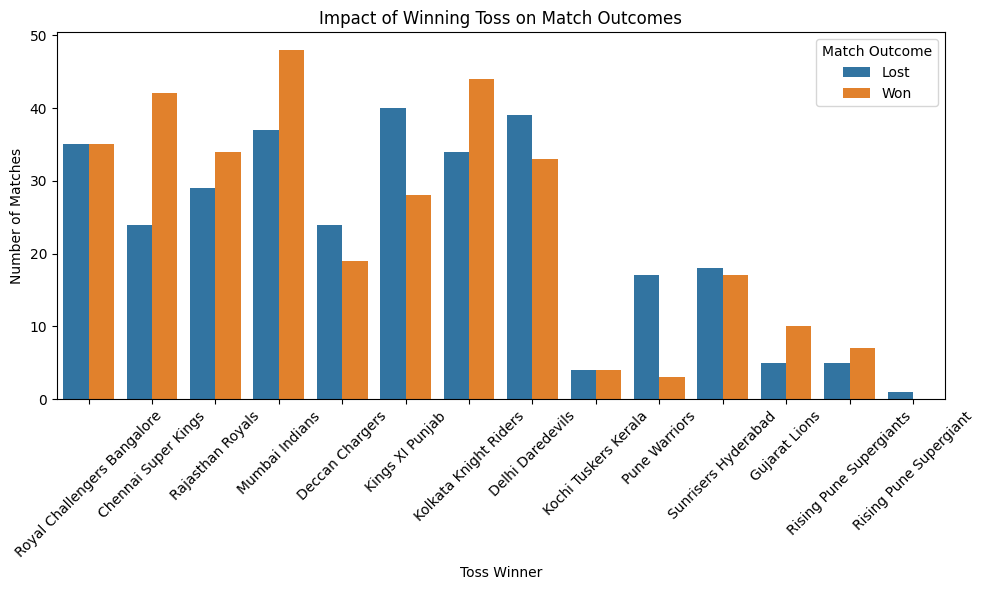

In [ ]:
toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")


In [ ]:
average_runs_pd = average_runs_in_wins.toPandas()

plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-3918589123838983>, line 6
      4 plt.figure(figsize=(12, 8))
      5 top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
----> 6 sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
      7 plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
      8 plt.xlabel('Player Name')

File /databricks/python/lib/python3.10/site-packages/seaborn/categorical.py:2755, in barplot(data, x, y, hue, order, hue_order, estimator, errorbar, n_boot, units, seed, orient, color, palette, saturation, width, errcolor, errwidth, capsize, dodge, ci, ax, **kwargs)
   2752 if estimator is len:
   2753     estimator = "size"
-> 2755 plotter = _BarPlotter(x, y, hue, data, order, hue_order,
   2756                       estimator, errorbar, n_boot, units, seed,
   2757                       orient,

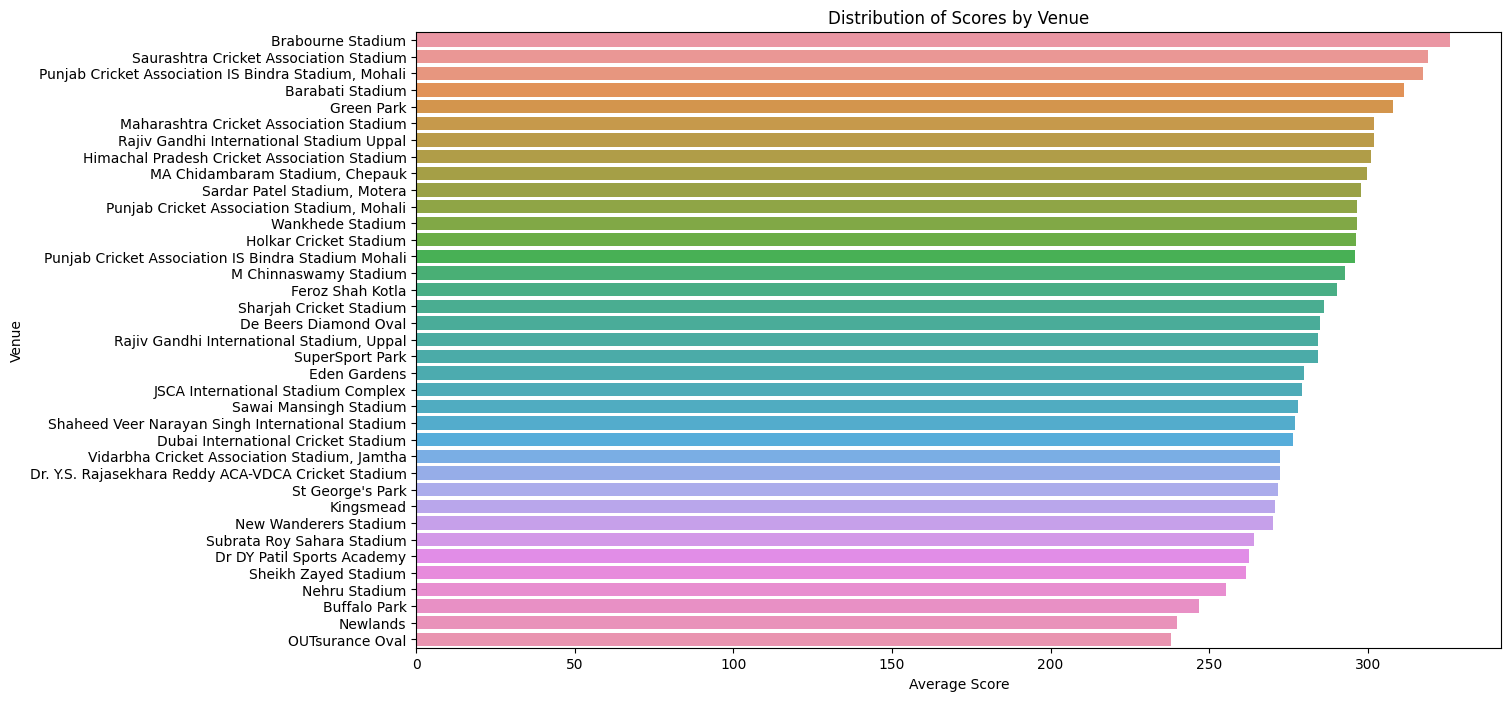

In [ ]:

scores_by_venue_pd = scores_by_venue.toPandas()

plt.figure(figsize=(14, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()
     